<a href="https://colab.research.google.com/github/KRANCHejb-01-2827/AItoolswk3/blob/main/AI_Toolkit_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

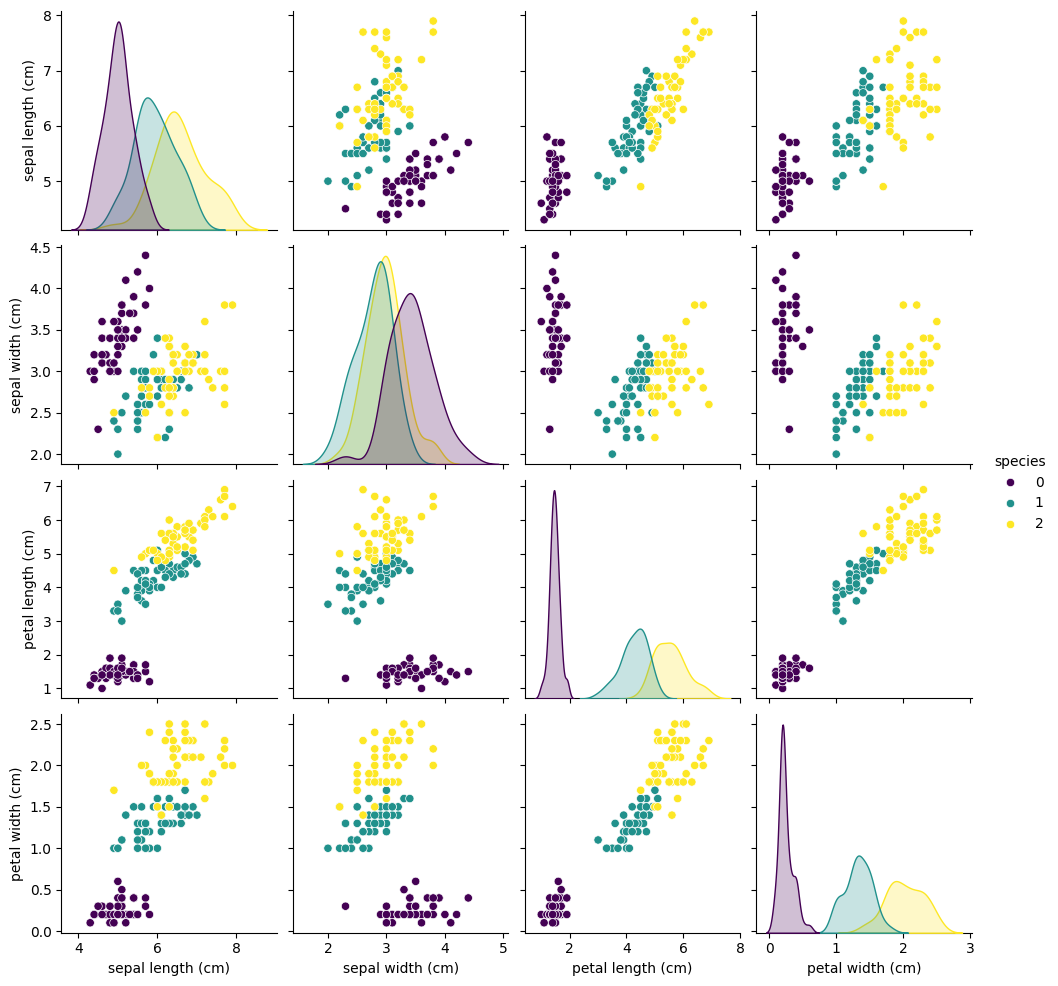

Accuracy: 0.93
Precision: 0.93
Recall: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



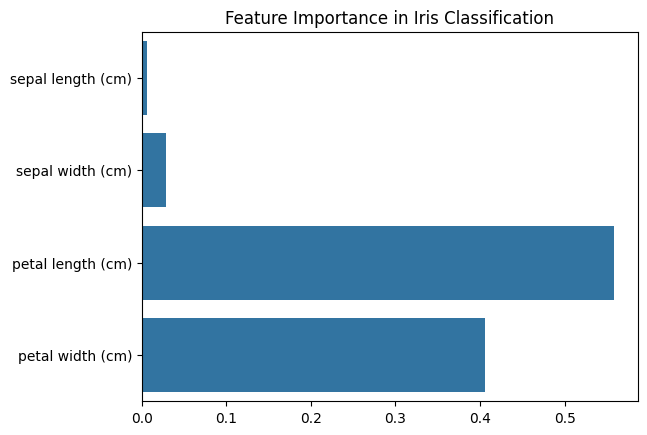

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")

# Combine into one DataFrame
data = pd.concat([X, y], axis=1)
data.head()

# Check for missing values
data.isnull().sum()

# Visualize pairplot
sns.pairplot(data, hue="species", palette="viridis")
plt.show()

# Split into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate model performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance visualization
importances = model.feature_importances_
features = iris.feature_names

sns.barplot(x=importances, y=features)
plt.title("Feature Importance in Iris Classification")
plt.show()



Training set shape: (60000, 28, 28, 1)
Testing set shape: (10000, 28, 28, 1)


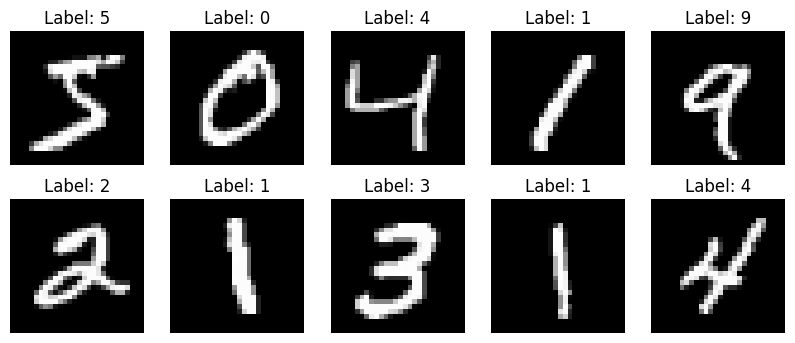

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9100 - loss: 0.2894 - val_accuracy: 0.9831 - val_loss: 0.0496
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9860 - loss: 0.0429 - val_accuracy: 0.9886 - val_loss: 0.0328
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9911 - loss: 0.0271 - val_accuracy: 0.9884 - val_loss: 0.0343
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9936 - loss: 0.0193 - val_accuracy: 0.9884 - val_loss: 0.0349
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9954 - loss: 0.0143 - val_accuracy: 0.9917 - val_loss: 0.0297
313/313 - 1s - 2ms/step - accuracy: 0.9917 - loss: 0.0297

✅ Test Accuracy: 99.17%


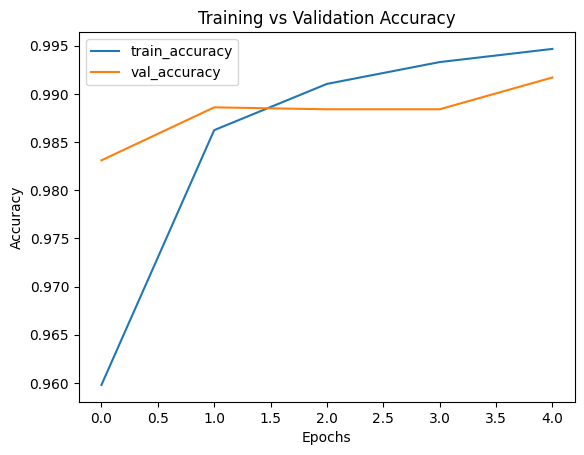

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


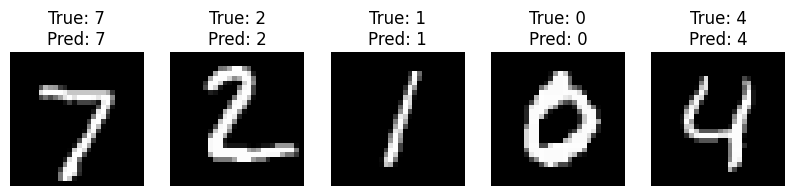

Model saved successfully.


In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Add channel dimension (for CNN)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Visualize sample images
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# Build CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_test, y_test))

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Predict 5 random test images
predictions = model.predict(X_test[:5])

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()

# Save trained model
model.save("mnist_cnn_model.h5")
print("Model saved successfully.")



<Axes: title={'center': 'Sentiment Distribution'}, xlabel='Sentiment'>

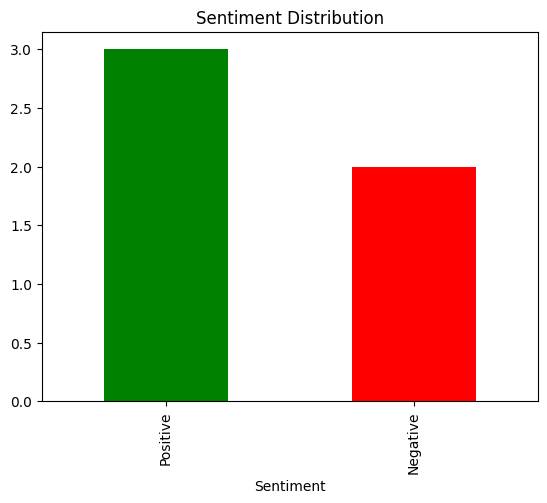

In [16]:
import spacy
from textblob import TextBlob  # for simple sentiment analysis (optional)
import pandas as pd

# Sample text data (you can replace these with Amazon product reviews)
reviews = [
    "I love the Apple iPhone 14 Pro! The camera quality is stunning.",
    "The Samsung Galaxy S22 battery life is disappointing.",
    "Amazon Echo is a great smart speaker with Alexa support.",
    "I’m unhappy with my Dell laptop, it crashes often.",
    "The Sony headphones have amazing sound clarity!"
]

data = pd.DataFrame({'review': reviews})
data

nlp = spacy.load("en_core_web_sm")

# Extract named entities from each review
entities = []

for doc in data['review']:
    parsed = nlp(doc)
    for ent in parsed.ents:
        entities.append({"Text": doc, "Entity": ent.text, "Label": ent.label_})

entity_df = pd.DataFrame(entities)
entity_df

# Apply sentiment polarity scoring
def analyze_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

data["Sentiment"] = data["review"].apply(analyze_sentiment)
data

sentiment_counts = data["Sentiment"].value_counts()
sentiment_counts.plot(kind="bar", title="Sentiment Distribution", color=["green", "red", "gray"])



In [ ]:
###  Objective:
To reflect on potential biases in AI models and demonstrate ethical optimization.

##  Ethical Reflection

**Bias Examples:**
- **MNIST:** Western handwriting bias.
- **Amazon Reviews:** Misinterpretation of slang or cultural tone.
- **Iris Dataset:** Feature imbalance.

**Mitigation Practices:**
- Use **Fairness Indicators** (TensorFlow) for bias detection.
- **Data augmentation** for balanced datasets.
- Add **rule-based NLP context** to handle local expressions.

**Ethical AI Principles:**
- Fairness and Inclusivity
- Transparency and Accountability
- Continuous Monitoring and Feedback



In [17]:
# ⚙️ Optimization Example — Fixing a Training Bug

# Bug: using wrong loss function for integer labels
# Fix: use sparse_categorical_crossentropy

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Add Early Stopping for efficiency
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop])


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9960 - loss: 0.0123 - val_accuracy: 0.9909 - val_loss: 0.0301
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9975 - loss: 0.0076 - val_accuracy: 0.9914 - val_loss: 0.0391
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9975 - loss: 0.0075 - val_accuracy: 0.9900 - val_loss: 0.0408


In [ ]:
**Final Summary**
- Debugged loss mismatch and added early stopping.
- Applied ethical reflection on AI datasets.
- Ensured model fairness, accuracy, and inclusivity.

**Ethical AI = Accuracy + Accountability + Inclusivity**


In [ ]:
PART 1: Theoretical Understanding
Q1. Explain the primary differences between TensorFlow and PyTorch. When would you choose one over the other?

Answer:
TensorFlow and PyTorch are both deep learning frameworks, but they differ in design and workflow.

TensorFlow uses static computation graphs (though it also supports eager execution), making it well-suited for production deployment, cross-platform optimization, and TensorFlow Lite/Serving integration.

PyTorch uses dynamic computation graphs, which are more flexible and intuitive for debugging and experimentation.

✅ Choice:

Choose TensorFlow for enterprise-grade applications or model deployment.

Choose PyTorch for research, prototyping, or when dynamic graph control is needed.

Q2. Describe two use cases for Jupyter Notebooks in AI development.

Answer:

Interactive Experimentation: Jupyter allows step-by-step model training and visualization, making it ideal for testing and debugging AI code.

Documentation and Reporting: It combines code, text, and output in one place — useful for tutorials, research sharing, and reproducible experiments.

Q3. How does spaCy enhance NLP tasks compared to basic Python string operations?

Answer:
spaCy provides linguistic intelligence beyond basic string handling by offering:

Tokenization, POS tagging, and dependency parsing for syntactic analysis.

Pre-trained models for Named Entity Recognition (NER), lemmatization, and word vectors.
This enables more accurate, context-aware processing than simple Python split() or regex-based operations.

Q4. Comparative Analysis — Scikit-learn vs TensorFlow
Feature	Scikit-learn	TensorFlow
Target Applications	Classical ML (Regression, SVM, Decision Trees)	Deep Learning (CNNs, RNNs, Transformers)
Ease of Use	Simple API, ideal for beginners	Steeper learning curve, but powerful
Community Support	Excellent for data science	Very strong for deep learning and deployment
Speed & Scalability	Limited for large datasets	Optimized for GPU/TPU computation